In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import torch 
from models.GPT4TS import GPT4TS
from sklearn.metrics import r2_score

In [2]:
import os
os.getcwd()

'/home/dan/NeurIPS2023-One-Fits-All1/Long-term_Forecasting'

In [9]:
#load the data
data_EPS=np.load('./monthly_eps_tensor.npy')


In [4]:
data_EPS.shape #

(524, 12721, 19)

In [5]:
#check which quarter do not have any observed input viriables
quarter_attr_list=[]
for i in range(data_EPS.shape[0]):
    if np.sum(~np.isnan(data_EPS[i,:,:-1])) != 0:
        quarter_attr_list.append(i)

print(quarter_attr_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [6]:
#check which quarter do not have any observed input viriables
quarter_attr_list=[]
for i in range(data_EPS.shape[0]):
    if (np.sum(~np.isnan(data_EPS[i, :, :-1])) != 0) and (np.sum(~np.isnan(data_EPS[i, :, -1])) != 0):
        quarter_attr_list.append(i)

print(quarter_attr_list)

[5, 15, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 

In [7]:
data_EPS=data_EPS[quarter_attr_list,:,:]

In [10]:
data_EPS=torch.Tensor(data_EPS)
data_EPS.shape

torch.Size([524, 12721, 19])

In [11]:
def generate_window(start, end):
    return list(range(start, end+1))

# Example usage
start = 200
end = data_EPS.shape[0]
window_list = generate_window(start, end)
print(window_list)

[200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,

In [12]:
# Define lag and future steps
lag = 12
future_steps = 1
X_list=[]
y_list=[]
#for all the windows
for w in window_list:
    data = np.array(range(w))
    # Create rolling window arrays for X (features) and y (target)
    X = []
    y = []
    for i in range(len(data)-lag-future_steps+1):
        X.append(data[i:i+lag])  # Use data from i to i+lag-1
        y.append(data[i+lag:i+lag+future_steps])  # Predict future_steps values ahead

    X = np.array(X)
    y = np.array(y)
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    X_list.append(X)
    y_list.append(y)

X shape: (188, 12)
y shape: (188, 1)
X shape: (189, 12)
y shape: (189, 1)
X shape: (190, 12)
y shape: (190, 1)
X shape: (191, 12)
y shape: (191, 1)
X shape: (192, 12)
y shape: (192, 1)
X shape: (193, 12)
y shape: (193, 1)
X shape: (194, 12)
y shape: (194, 1)
X shape: (195, 12)
y shape: (195, 1)
X shape: (196, 12)
y shape: (196, 1)
X shape: (197, 12)
y shape: (197, 1)
X shape: (198, 12)
y shape: (198, 1)
X shape: (199, 12)
y shape: (199, 1)
X shape: (200, 12)
y shape: (200, 1)
X shape: (201, 12)
y shape: (201, 1)
X shape: (202, 12)
y shape: (202, 1)
X shape: (203, 12)
y shape: (203, 1)
X shape: (204, 12)
y shape: (204, 1)
X shape: (205, 12)
y shape: (205, 1)
X shape: (206, 12)
y shape: (206, 1)
X shape: (207, 12)
y shape: (207, 1)
X shape: (208, 12)
y shape: (208, 1)
X shape: (209, 12)
y shape: (209, 1)
X shape: (210, 12)
y shape: (210, 1)
X shape: (211, 12)
y shape: (211, 1)
X shape: (212, 12)
y shape: (212, 1)
X shape: (213, 12)
y shape: (213, 1)
X shape: (214, 12)
y shape: (214, 1)
X

In [22]:
#couple resnet
import pandas as pd
from datetime import datetime
import numpy as np
#import tensorly.tenalg
import numpy as np
import torch
from torch.nn.init import xavier_normal_
import time
from collections import defaultdict
from torch.optim.lr_scheduler import ExponentialLR
import argparse
import array
from collections import defaultdict 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt 

#save the result
import pickle

#import tensorly.tenalg
import torch.nn as nn
from sklearn.model_selection import KFold
#check cuda
torch.cuda.is_available()

True

In [23]:
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), path)
        self.val_loss_min = val_loss

In [24]:
#all the functions need to use later

def plot_loss(dic):
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(dic['train_loss'], label='Training loss ')
    plt.plot(dic['val_loss'], label='Validation loss ')
    plt.legend(frameon=False)
    plt.title('train and validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.subplot(1, 2, 2)
    plt.plot(dic['val_mae'])
    plt.title('validation MAE')
    plt.xlabel('epoch')
    plt.ylabel('MAE')
    plt.show()
    
def multi_mode_dot(tensor, matrix_or_vec_list, modes=None, skip=None):
    if modes is None:
        modes = range(len(matrix_or_vec_list))

    decrement = 0  # If we multiply by a vector, we diminish the dimension of the tensor

    res = tensor

    # Order of mode dots doesn't matter for different modes
    # Sorting by mode shouldn't change order for equal modes
    factors_modes = sorted(zip(matrix_or_vec_list, modes), key=lambda x: x[1])
    for i, (matrix_or_vec, mode) in enumerate(factors_modes):
        if (skip is not None) and (i == skip):
            continue

        if mode==2:
            res = tensorly.tenalg.mode_dot(res, matrix_or_vec, mode - decrement)
        else:
            res = tensorly.tenalg.mode_dot(res, matrix_or_vec, mode - decrement)
            res=torch.nn.functional.leaky_relu_(torch.tensor(res)) 
            res=res.detach().numpy()
            
        
        

        if np.ndim(matrix_or_vec) == 1:
            decrement += 1

    return res

def mape(y_true, y_pred, threshold=0.1):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    v = np.clip(np.abs(y_true), threshold, None)
    diff = np.abs((y_true - y_pred) / v)
    return  100.0 * np.mean(diff, axis=-1).mean()

def mae(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_pred - y_true))

def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean(np.square(y_pred - y_true)))



#use relu or leaky_relu function
def nonlinear(active,vector):
    if active=='relu':
        return torch.nn.functional.relu_(vector)
    elif active == 'leaky_relu':
        return torch.nn.functional.leaky_relu_(vector)
    
#use relu or leaky_relu layer    
def non_layer(active):
    if active=='relu':
        return nn.ReLU()
    elif active=='leaky_relu':
        return nn.LeakyReLU()
    
def train_val_split(tr_idxs,tr_vals,validation_split):
    validation_split = validation_split
    dataset_size = len(tr_vals)
    indices = list(range(dataset_size))
    split = int(np.floor(validation_split * dataset_size))
    np.random.seed(1337)
    np.random.shuffle(indices)
    train_indices, valid_indices = indices[split:], indices[:split]
    tr_idx=tr_idxs[train_indices]
    tr_val=tr_vals[train_indices].reshape(-1,1)
    val_idx=tr_idxs[valid_indices]
    val_val=tr_vals[valid_indices].reshape(-1,1)
    trainset=np.concatenate((tr_idx,tr_val),axis=1)
    valset=np.concatenate((val_idx,val_val),axis=1)
    return trainset,valset

def get_result(experiment,model,tr_idxs,tr_vals):
    _,mse,rmse,mae,mape=experiment.evaluate(model,tr_idxs,tr_vals)
    print('mse:',mse,'rmse:',rmse,'mae:',mae,'mape:',mape)

In [25]:
import numpy as np
import torch
import torch.nn as nn
from torch import optim

from transformers.models.gpt2.modeling_gpt2 import GPT2Model
from transformers import BertTokenizer, BertModel
from einops import rearrange
from embed import DataEmbedding, DataEmbedding_wo_time
from transformers.models.gpt2.configuration_gpt2 import GPT2Config

class GPT4TS(nn.Module):
    
    def __init__(self, configs, device):
        super(GPT4TS, self).__init__()
        self.is_gpt = configs.is_gpt
        self.patch_size = configs.patch_size
        self.pretrain = configs.pretrain
        self.stride = configs.stride
        self.patch_num = (configs.seq_len - self.patch_size) // self.stride + 1

        self.padding_patch_layer = nn.ReplicationPad1d((0, self.stride)) 
        self.patch_num += 1

        
        if configs.is_gpt:
            if configs.pretrain:
                self.gpt2 = GPT2Model.from_pretrained('gpt2', output_attentions=True, output_hidden_states=True)  # loads a pretrained GPT-2 base model
            else:
                print("------------------no pretrain------------------")
                self.gpt2 = GPT2Model(GPT2Config())
            self.gpt2.h = self.gpt2.h[:configs.gpt_layers]
            print("gpt2 = {}".format(self.gpt2))
        
        self.in_layer = nn.Linear(configs.patch_size, configs.d_model)
        self.out_layer = nn.Linear(configs.d_model * self.patch_num, configs.pred_len)

        
        if configs.pretrain:
            for i, (name, param) in enumerate(self.gpt2.named_parameters()):
                if 'ln' in name or 'wpe' in name:
                    param.requires_grad = True
                else:
                    param.requires_grad = False

        for layer in (self.gpt2, self.in_layer, self.out_layer):
            layer.to(device=device)
            layer.train()
        
        self.cnt = 0


    def forward(self, x, itr):
        B, L, M = x.shape

        means = x.mean(1, keepdim=True).detach()
        x = x - means
        stdev = torch.sqrt(torch.var(x, dim=1, keepdim=True, unbiased=False)+ 1e-5).detach() 
        x /= stdev

        x = rearrange(x, 'b l m -> b m l')

        x = self.padding_patch_layer(x)
        x = x.unfold(dimension=-1, size=self.patch_size, step=self.stride)
        x = rearrange(x, 'b m n p -> (b m) n p')

        outputs = self.in_layer(x)
        if self.is_gpt:
            outputs = self.gpt2(inputs_embeds=outputs).last_hidden_state

        outputs = self.out_layer(outputs.reshape(B*M, -1))
        outputs = rearrange(outputs, '(b m) l -> b l m', b=B)




        #outputs = outputs * stdev
        #outputs = outputs + means

        return outputs

In [26]:
#shi zhe ge
class ResNet_CP(torch.nn.Module):
    def __init__(self,shape,Rank_CP,rank_CP,layer,batch_size,active,Cuda,args,**kwargs):
        super(ResNet_CP, self).__init__()
        device = torch.device('cuda:0')
        self.gpt2 = GPT4TS(args, device)
        #original core initial parameters
        self.E = torch.nn.Embedding(shape[0], Rank_CP, padding_idx=0)#.cuda()#common mode XY
        self.R = torch.nn.Embedding(shape[1], Rank_CP, padding_idx=0)#.cuda()#common mode XY
        self.P = torch.nn.Embedding(shape[2], Rank_CP, padding_idx=0)#.cuda()#individual mode for tensor X
        if Cuda:
            print(Cuda)
            self.E = self.E.cuda()
            self.R =self.R.cuda()
            self.P =self.P.cuda()  
 
        self.loss = torch.nn.MSELoss()
        
        self.Rank_CP=Rank_CP
        self.rank_CP=rank_CP
        self.batch_size=batch_size
        self.layer=layer
        
    def init(self):
        xavier_normal_(self.E.weight.data)
        xavier_normal_(self.R.weight.data)
        xavier_normal_(self.P.weight.data)
        

    def forward(self, time,re_idx,rr_idx,rp_idx,e_idx, r_idx, p_idx):
        Esum=self.E.weight
        Rsum=self.R.weight
        Psum=self.P.weight
        esum=Esum[time,:]

        #reconstruction
        re = esum[re_idx,:]
            #e = self.bn0(e) #batch
        re = re.view(-1,self.Rank_CP) #b*R
        rr = Rsum[rr_idx,:]
            #r = self.bn1(r)#batch
        rr = rr.view(-1,self.Rank_CP) #b*R
        rp = Psum[rp_idx,:]
            #p = self.bn2(p)#batch
        rp = rp.view(-1,self.Rank_CP) #b*R
        reconstruct_tensor=torch.zeros(re.shape[0],device="cuda")
        for i in range(self.Rank_CP):
            reconstruct_tensor+= re[:,i] * rr[:,i] * rp[:,i]
        recons=reconstruct_tensor

        #prediction
        pred_eemb=self.gpt2(esum.unsqueeze(0),1)
        
       
        e = pred_eemb.squeeze(0)[e_idx,:]
            #e = self.bn0(e) #batch
        e = e.view(-1,self.Rank_CP) #b*R
        r = Rsum[r_idx,:]
            #r = self.bn1(r)#batch
        r = r.view(-1,self.Rank_CP) #b*R
        p = Psum[p_idx,:]
            #p = self.bn2(p)#batch
        p = p.view(-1,self.Rank_CP) #b*R
            
        #CP
        reconstruct_tensor=torch.zeros(e.shape[0],device="cuda")
        for i in range(self.Rank_CP):
            reconstruct_tensor+= e[:,i] * r[:,i] * p[:,i]
        pred=reconstruct_tensor
            #print(pred)
            #print(pred.shape)
        return(pred,recons)

In [27]:
########################################################
#Experiment
########################################################
class Experiment:
    
    def __init__(self, learning_rate=0.0005,shape=(3,4,5,6),rank=(2,3,4,5),validation_split=0.1,
                 num_iterations=500, decay_rate=0., cuda=True, 
                 input_dropout=0.3, hidden_dropout1=0.4, hidden_dropout2=0.4, p_vec_dim = 20, 
                 label_smoothing=0.,model='TuckER',batch_size=4,patience=5,core=(2,3,4),ccore=(2,3,4),cccore=(2,3,4),
                 res_rank=(2,2,2),layer=34,Rank_CP=20,rank_CP=10,active='relu',tr_idxs=1,tr_vals=1,data=1,args=1,X_list=1,y_list=1,recons_lambda=1):
        self.learning_rate = learning_rate
        self.shape = shape
        self.rank = rank
        self.res_rank=res_rank
        self.layer=layer
        self.core = core
        self.ccore = ccore
        self.cccore = cccore
        self.num_iterations = num_iterations
        self.decay_rate = decay_rate
        self.label_smoothing = label_smoothing
        self.cuda = cuda
        self.model = model
        self.batch_size = batch_size
        self.patience=patience
        self.Rank_CP=Rank_CP
        self.rank_CP=rank_CP
        self.active=active
        self.tr_idxs=tr_idxs
        self.tr_vals=tr_vals
        self.validation_split=validation_split
        self.data=data
        self.args=args
        self.X_list=X_list
        self.y_list=y_list
        self.recons_lambda=recons_lambda
        self.kwargs = {"input_dropout": input_dropout, "hidden_dropout1": hidden_dropout1,
                       "hidden_dropout2": hidden_dropout2}
        
        
    def save_models(epoch):
        torch.save(model.state_dict(), "./adclickmodel_{}.model".format(epoch))
        print("Chekcpoint saved")
        

    def get_index(self, data):
        batch = data
        targets = data[:,-1]
        targets = torch.FloatTensor(targets)
        if self.cuda:
           targets = targets.cuda()
        #print (targets)
        return np.array(batch), targets

        

    def evaluate(self, model, idxs,vals):
        with torch.no_grad():
            model.eval()
            #prob_list=[]
            prediction_list=[]
            target_list=[]
            losses=[]
            rmse_list=[]
            mae_list=[]
            
            data_EPS=self.data
            for j in range(vals.shape[0]):
                input_data= data_EPS[idxs[j,:],:,:] #input lag p tensor
                output_data=data_EPS[vals[j,:],:,:] #output future f return
                input_values = input_data[~torch.isnan(input_data)].reshape(-1,1)
                input_indx = torch.stack(torch.where(~torch.isnan(input_data))).T
                input_all=torch.hstack([input_indx,input_values])
                output_values = output_data[~torch.isnan(output_data)].reshape(-1,1)
                output_indx = torch.stack(torch.where(~torch.isnan(output_data))).T
                output_all=torch.hstack([output_indx,output_values])
                output_all=output_all[output_all[:,2]==(data_EPS.shape[2]-1)]
                input_batch, input_targets = self.get_index(input_all)
                output_batch, output_targets = self.get_index(output_all)
                re_idx = torch.tensor(input_batch[:,0].astype(int))
                rr_idx = torch.tensor(input_batch[:,1].astype(int))
                rp_idx = torch.tensor(input_batch[:,2].astype(int))
                #q_idx = torch.tensor(data_batch[:,3].astype(int))
                if self.cuda:
                    re_idx = re_idx.cuda()
                    rr_idx = rr_idx.cuda()
                    rp_idx = rp_idx.cuda()
                    #q_idx = q_idx.cuda()
                e_idx = torch.tensor(output_batch[:,0].astype(int))
                r_idx = torch.tensor(output_batch[:,1].astype(int))
                p_idx = torch.tensor(output_batch[:,2].astype(int))
                #q_idx = torch.tensor(data_batch[:,3].astype(int))
                if self.cuda:
                    e_idx = e_idx.cuda()
                    r_idx = r_idx.cuda()
                    p_idx = p_idx.cuda()
                    #q_idx = q_idx.cuda()
                predictions,recons = model.forward(idxs[j,:],re_idx,rr_idx,rp_idx,e_idx, r_idx,p_idx) #q_index
            
                #prob_list=prob_list+predictions.cpu().tolist() #this is for the logloss bceloss
                #prediction_list=prediction_list+torch.round(predictions).cpu().tolist() #this is for the logloss bceloss
                prediction_list=prediction_list+predictions.cpu().tolist() #this is for mse loss
                target_list=target_list+output_targets.cpu().tolist()

                loss = model.loss(predictions, output_targets)+self.recons_lambda * model.loss(recons,input_targets)
                losses.append(loss.item())
            '''
                rmse=np.square(predictions.cpu() - targets.cpu())
                rmse=rmse.tolist()
                rmse_list=rmse_list+rmse

                mae=np.abs(predictions.cpu() - targets.cpu())
                mae=mae.tolist()
                mae_list=mae_list+mae
            '''
            
            
            val_loss=np.mean(losses)
            #val_rmse=np.sqrt(np.mean(rmse_list))
            #val_mae=np.mean(mae_list)
             
            val_mae=mae(target_list, prediction_list)
            val_rmse=rmse(target_list, prediction_list)
            val_mape=r2_score(target_list, prediction_list)
            #precision = precision_score(target_list, prediction_list)
            #recall = recall_score(target_list, prediction_list)
            #accuracy = accuracy_score(target_list, prediction_list)
            #f1= f1_score(target_list, prediction_list)
            #fpr, tpr, thresholds = metrics.roc_curve(target_list, prob_list, pos_label=1)
            #auc=metrics.auc(fpr, tpr)
        
            return prediction_list,val_loss,val_rmse,val_mae,val_mape #val_loss,accuracy,precision,recall,f1,auc,target_list,prob_list #val_rmse val_mae
    
    

    
    
    
    



    def train_and_eval(self):
        train_losses=[]
        val_losses=[]
        #val_accuracies=[]
        #val_precisions=[]
        #val_recalls=[]
        #val_f1s=[]
        #val_aucs=[]
        val_rmses=[]
        val_maes=[]
        val_mapes=[]
        
        print("Training the TuckER model...")
        data_EPS=self.data
        if self.model=='ResNet_CP':
           model=ResNet_CP(self.shape,self.Rank_CP,self.rank_CP,self.layer,self.batch_size,self.active,self.cuda,self.args,**self.kwargs)
            
        if self.cuda:
            model.cuda()
        model.init()
        opt = torch.optim.Adam(model.parameters(), lr=self.learning_rate)
        if self.decay_rate:
            scheduler = ExponentialLR(opt, self.decay_rate)

        print("Starting training...")
        # initialize the early_stopping object
        #init_E = model.E.weight.data.clone().detach()
        #init_e = model.e1[0].weight.data.clone().detach()
        early_stopping = EarlyStopping(patience=self.patience, verbose=True)

        train_mse_list=[]
        val_mse_list=[]
        val_r2_list=[]
        test_rmse_list=[]
        test_r2_list=[]
        model_list=[]

        best_epoch = 0
        best_val_loss = float('inf')
        ############### for each window
        for w in range(len(self.y_list)):
            X=self.X_list[w]
            y=self.y_list[w]
            X_train=X[:-2,:]
            y_train=y[:-2,:]
            X_val= np.expand_dims(X[-2,:],axis=0)
            y_val=np.expand_dims(y[-2,:], axis=0)
            X_test= np.expand_dims(X[-1,:],axis=0)
            y_test=np.expand_dims(y[-1,:], axis=0)
        
            for it in range(1, self.num_iterations+1):
                start_train = time.time()
                model.train()    
                losses = []
                #np.random.shuffle(train_data_idxs)
                #for j in range(0, len(train_data_idxs),self.batch_size):
            
    
                for j in range(y_train.shape[0]):
                    input_data= data_EPS[X_train[j,:],:,:] #input lag p tensor
                    output_data=data_EPS[y_train[j,:],:,:] #output future f return
                    input_values = input_data[~torch.isnan(input_data)].reshape(-1,1)
                    input_indx = torch.stack(torch.where(~torch.isnan(input_data))).T
                    input_all=torch.hstack([input_indx,input_values])
                    output_values = output_data[~torch.isnan(output_data)].reshape(-1,1)
                    output_indx = torch.stack(torch.where(~torch.isnan(output_data))).T
                    output_all=torch.hstack([output_indx,output_values])
                    output_all=output_all[output_all[:,2]==(data_EPS.shape[2]-1)]
                    input_batch, input_targets = self.get_index(input_all)
                    output_batch, output_targets = self.get_index(output_all)

                    opt.zero_grad()
                    re_idx = torch.tensor(input_batch[:,0].astype(int))
                    rr_idx = torch.tensor(input_batch[:,1].astype(int))
                    rp_idx = torch.tensor(input_batch[:,2].astype(int))
                    #q_idx = torch.tensor(data_batch[:,3].astype(int))
                    if self.cuda:
                        re_idx = re_idx.cuda()
                        rr_idx = rr_idx.cuda()
                        rp_idx = rp_idx.cuda()
                    e_idx = torch.tensor(output_batch[:,0].astype(int))
                    r_idx = torch.tensor(output_batch[:,1].astype(int))
                    p_idx = torch.tensor(output_batch[:,2].astype(int))  
                    #q_idx = torch.tensor(data_batch[:,3].astype(int)) 
                    if self.cuda:
                        e_idx = e_idx.cuda()
                        r_idx = r_idx.cuda()
                        p_idx = p_idx.cuda()
                        #q_idx = q_idx.cuda()
                    predictions,recons = model.forward(X_train[j,:],re_idx,rr_idx,rp_idx,e_idx, r_idx , p_idx) #q_index
                    if self.label_smoothing:
                        targets = ((1.0-self.label_smoothing)*targets) + (1.0/targets.size(1))           
                    loss = model.loss(predictions, output_targets)+self.recons_lambda * model.loss(recons,input_targets)
                    loss.backward(retain_graph=True)
                    opt.step()
                    losses.append(loss.item())
                    #print(list(model.parameters()))
                
      
                if self.decay_rate:
                    scheduler.step()
                train_loss=np.mean(losses)
                train_losses.append(train_loss)
                print(w,it)
                print(time.time()-start_train)    
                print(train_loss)
            

            
                with torch.no_grad():
                    print("Validation:")
                    _,val_loss,val_rmse,val_mae,val_mape= self.evaluate(model,X_val,y_val) #val_rmse,val_mae val_loss,val_accuracy,val_precision,val_recall,val_f1,val_auc,tar,prob
                    val_losses.append(val_loss)
                    #val_accuracies.append(val_accuracy)
                    #val_precisions.append(val_precision)
                    #val_f1s.append(val_f1)
                    #val_recalls.append(val_recall)
                    #val_aucs.append(val_auc)
                    val_rmses.append(val_rmse)
                    val_maes.append(val_mae)
                    val_mapes.append(val_mape)
                
                    print('val_loss:{0}'.format(val_loss))
                    print('val_rmse:{0}'.format(val_rmse))
                    print('val_mae:{0}'.format(val_mae))
                    print('val_r_squared:{0}'.format(val_mape))
               
                    if val_loss < best_val_loss:
                        best_val_loss = val_loss
                        best_epoch = it
                        torch.save(model.state_dict(), path)
                    
                    early_stopping(val_loss, model)
                    if early_stopping.early_stop:
                        print("Early stopping")
                        break
                

            ######################################################################################################################################    
            # load the last checkpoint with the best model #retrain the model adding the validation set,and add reconstruction loss in validation.
            ######################################################################################################################################

            
            model.load_state_dict(torch.load(path))
            for epoch in range(best_epoch):
                model.train()    
                losses = []
                X_train_new=X[:-1,:]
                y_train_new=y[:-1,:]
                for j in range(y_train_new.shape[0]):
                    input_data = data_EPS[X_train_new[j, :], :, :] # input lag p tensor
                    output_data = data_EPS[y_train_new[j, :], :, :] # output future f return
                    input_values = input_data[~torch.isnan(input_data)].reshape(-1, 1)
                    input_indx = torch.stack(torch.where(~torch.isnan(input_data))).T
                    input_all = torch.hstack([input_indx, input_values])
                    output_values = output_data[~torch.isnan(output_data)].reshape(-1, 1)
                    output_indx = torch.stack(torch.where(~torch.isnan(output_data))).T
                    output_all = torch.hstack([output_indx, output_values])
                    output_all = output_all[output_all[:, 2] == (data_EPS.shape[2] - 1)]
                    input_batch, input_targets = self.get_index(input_all)
                    output_batch, output_targets = self.get_index(output_all)

                    opt.zero_grad()
                    re_idx = torch.tensor(input_batch[:, 0].astype(int))
                    rr_idx = torch.tensor(input_batch[:, 1].astype(int))
                    rp_idx = torch.tensor(input_batch[:, 2].astype(int))
                    if self.cuda:
                        re_idx = re_idx.cuda()
                        rr_idx = rr_idx.cuda()
                        rp_idx = rp_idx.cuda()
                    e_idx = torch.tensor(output_batch[:, 0].astype(int))
                    r_idx = torch.tensor(output_batch[:, 1].astype(int))
                    p_idx = torch.tensor(output_batch[:, 2].astype(int))  
                    if self.cuda:
                        e_idx = e_idx.cuda()
                        r_idx = r_idx.cuda()
                        p_idx = p_idx.cuda()
                    predictions, recons = model.forward(X_train_new[j, :], re_idx, rr_idx, rp_idx, e_idx, r_idx, p_idx)
                    if self.label_smoothing:
                        targets = ((1.0 - self.label_smoothing) * targets) + (1.0 / targets.size(1))           
                    loss = model.loss(predictions, output_targets) + self.recons_lambda * model.loss(recons, input_targets)
                    loss.backward(retain_graph=True)
                    opt.step()
                    losses.append(loss.item())
                
                if self.decay_rate:
                    scheduler.step()
                train_loss = np.mean(losses)
                train_losses.append(train_loss)
                print(w, epoch)
                print(train_loss)


            with torch.no_grad():
                 _,test_loss,test_rmse,test_mae,test_mape= self.evaluate(model,X_test,y_test)
            print('WINDOW',w,'TEST PERFORMANCE')     
            print('test_loss:{0}'.format(test_loss))
            print('test_rmse:{0}'.format(test_rmse))
            print('test_mae:{0}'.format(test_mae))
            print('test_r_squared:{0}'.format(test_mape))
            train_mse_list.append(train_losses)
            val_mse_list.append(val_losses)
            val_r2_list.append(val_mapes)
            test_rmse_list.append(test_rmse)
            test_r2_list.append(test_mape)
            model_list.append(model)
            dic = dict()
            dic['train_loss'] = train_mse_list
            dic['val_loss']   = val_mse_list
            dic['val_r2']=val_r2_list
            dic['test_rmse']= test_rmse_list
            dic['test_r2']=test_r2_list
            dic['model']=model_list
            with open(path, 'wb') as file:
                 pickle.dump(dic, file)




        
        final_rmse_mean=np.array(test_rmse_list).mean()
        final_rmse_std=np.array(test_rmse_list).mean()
        final_r2_mean=np.array(test_r2_list).mean()
        final_r2_std=np.array(test_r2_list).mean()
        print('final_rmse_mean',final_rmse_mean,'final_rmse_std',final_rmse_std,'final_r2_mean',final_r2_mean,'final_r2_std',final_r2_std)

        print('final_rmse')    
        dic = dict()
        dic['train_loss'] = train_mse_list
        dic['val_loss']   = val_mse_list
        dic['val_r2']=val_r2_list
        dic['test_rmse']= test_rmse_list
        dic['test_r2']=test_r2_list
        dic['model']=model_list
        return dic

In [28]:

import argparse
if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument("--dataset", type=str, default="FB15k-237", nargs="?",
                    help="Which dataset to use: FB15k, FB15k-237, WN18 or WN18RR.")
    parser.add_argument("--num_iterations", type=int, default=5000, nargs="?",
                    help="Number of iterations.")
    parser.add_argument("--patience", type=int, default=20, nargs="?",
                    help="patience for early stop.")
    parser.add_argument("--batch_size", type=int, default=128, nargs="?",
                    help="Batch size.")
    parser.add_argument("--lr", type=float, default=5e-5, nargs="?",
                    help="Learning rate.")
    parser.add_argument("--dr", type=float, default=0.0, nargs="?",
                    help="Decay rate.")
    parser.add_argument("--shape", default=(17860, 147552, 39, 2), nargs="?",
                    help="Shape of original tensor.")
    parser.add_argument("--rank", default=(5,5,5,5), nargs="?",
                    help="Shape of core tensor.")
    parser.add_argument("--res_rank", default=(2,2,2,2), nargs="?",
                    help="Shape of core tensor.")
    parser.add_argument("--res_layer", default=34, nargs="?",
                    help="Shape of core tensor.")
    parser.add_argument("--core", default=(4,4,4), nargs="?",
                    help="Shape of core tensor.")
    parser.add_argument("--ccore", default=(3,3,3), nargs="?",
                    help="Shape of core tensor.")
    parser.add_argument("--cccore", default=(2,2,2), nargs="?",
                    help="Shape of core tensor.")
    parser.add_argument("--cuda", type=bool, default=True, nargs="?",
                    help="Whether to use cuda (GPU) or not (CPU).")
    parser.add_argument("--input_dropout", type=float, default=0.3, nargs="?",
                    help="Input layer dropout.")
    parser.add_argument("--hidden_dropout1", type=float, default=0.1, nargs="?",
                    help="Dropout after the first hidden layer.")
    parser.add_argument("--hidden_dropout2", type=float, default=0.0, nargs="?",
                    help="Dropout after the second hidden layer.")
    parser.add_argument("--label_smoothing", type=float, default=False, nargs="?",
                    help="Amount of label smoothing.")
    parser.add_argument("--Rank_CP", type=int, default=False, nargs="?",
                    help="Rank of CP")
    parser.add_argument("--rank_CP", type=int, default=False, nargs="?",
                    help="Residual Rank of CP") 
    parser.add_argument("--active", type=str,default='relu', nargs="?",
                    help="use relu or leaky_relu")    
    parser.add_argument("--validation_split", type=float, default=0.1, nargs="?",
                    help="validation split ratio")
    parser.add_argument("--model", type=str, default='Matryoshka', nargs="?",
                    help="use which model:TuckER,Matryoshka,Matryoshka_2,Matryoshka_3.") #false is to use leaky_relu, true is to use relu
    parser.add_argument("--is_gpt", type=int, default=1)
    parser.add_argument("--patch_size", type=int, default=3)
    parser.add_argument("--pretrain", type=int, default=1)
    parser.add_argument("--stride", type=int, default=1)
    parser.add_argument("--seq_len", type=int, default=lag)
    parser.add_argument("--pred_len", type=int, default=future_steps)
    parser.add_argument("--gpt_layers", type=int, default=3)
    parser.add_argument("--e_layers", type=int, default=3)
    parser.add_argument("--d_model", type=int, default=768)


    #args = parser.parse_args() 
    args=parser.parse_known_args()[0]

In [29]:


    path='checkpoint0_fine.pt'

    torch.backends.cudnn.deterministic = True 
    seed = 20
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available:
        torch.cuda.manual_seed_all(seed) 
    experiment = Experiment(Rank_CP=100,learning_rate=1e-4,model='ResNet_CP',active="relu",cuda=True,
                            num_iterations=5000, batch_size=2048, 
                            shape=data_EPS.shape,patience=30,data=data_EPS,args=args,X_list=X_list,y_list=y_list,recons_lambda=1e-4
                            )
    dic=experiment.train_and_eval()

Training the TuckER model...
gpt2 = GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-2): 3 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2SdpaAttention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)
True
Starting training...


`GPT2SdpaAttention` is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


0 1
751.483921289444
nan
Validation:
val_loss:41146.9296875
val_rmse:0.37231812865727926
val_mae:0.19383101798486205
val_r_squared:0.13225418511607656
Validation loss decreased (inf --> 41146.929688).  Saving model ...
0 2
750.6905221939087
nan
Validation:
val_loss:41146.94140625
val_rmse:0.3858525909998481
val_mae:0.19690598616229923
val_r_squared:0.06801911866873322
EarlyStopping counter: 1 out of 30
0 3
750.0574834346771
nan
Validation:
val_loss:41146.9765625
val_rmse:0.42743436029114895
val_mae:0.20844856893354854
val_r_squared:-0.1436760420950507
EarlyStopping counter: 2 out of 30
0 4
750.6258325576782
nan
Validation:
val_loss:41147.01953125
val_rmse:0.4772261174168367
val_mae:0.22105107137985114
val_r_squared:-0.4256488516729149
EarlyStopping counter: 3 out of 30
0 5
750.852744102478
nan
Validation:
val_loss:41147.078125
val_rmse:0.5325437746937761
val_mae:0.24001917085498226
val_r_squared:-0.7753123982480148
EarlyStopping counter: 4 out of 30
0 6
750.268913269043
nan
Validation:

RuntimeError: Invalid magic number; corrupt file?

In [29]:
import pickle
with open(path, 'wb') as file:
    pickle.dump(dic, file)

In [45]:
np.array(dic['val_r2'][0]).mean()

0.05596704411014583

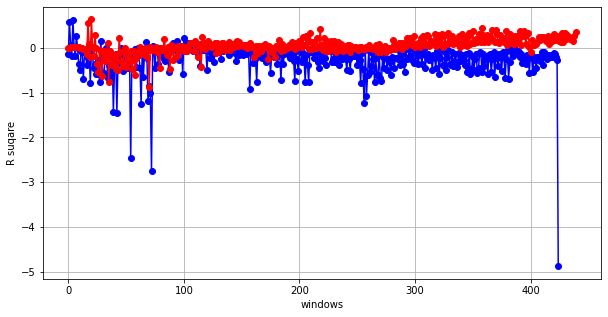

In [46]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(dic['test_r2'], marker='o', linestyle='-', color='b')
plt.plot(dic['val_r2'][0], marker='o', linestyle='-', color='r')

# Add title and labels
plt.xlabel('windows')
plt.ylabel('R suqare')

# Display the plot
plt.grid(True)
plt.show()

In [39]:
dic['val_r2'][0]

[-0.003590192017632443,
 0.004139344253471289,
 0.01724373583487049,
 0.02306437704023201,
 0.028238137050410672,
 0.030022957663726757,
 0.029347263239437593,
 0.02609117529192584,
 0.02030784983991174,
 0.013851922062567024,
 0.0075064319225823795,
 -0.0008520300850860529,
 -0.00908477514733752,
 -0.01947045958614968,
 -0.029365170831233245,
 -0.040501325031943924,
 -0.14421606223468375,
 0.5657148123389971,
 0.07956211218479758,
 -0.19350346562872622,
 0.6411877358678295,
 0.023806758351290758,
 -0.1844534112916809,
 0.3022177293748799,
 0.00239653858992972,
 -0.3642316366580851,
 -0.5435507977610008,
 -0.05470388467342713,
 -0.0760969962987732,
 -0.6352827449504548,
 -0.06227446482743937,
 -0.05597466358181369,
 -0.28183688495873715,
 -0.17730366850908408,
 0.10511046410448299,
 -0.753334534478685,
 -0.07133120360478218,
 -0.10352824636664826,
 -0.37293944678276825,
 -0.24028198537973844,
 -0.38504973488018424,
 -0.4645335745739365,
 -0.1429983153531984,
 -0.4950256721067021,
 0.23

In [12]:
#CP_net
path='checkpoint1.pt'
for r in (10,20,30,40):
    torch.backends.cudnn.deterministic = True 
    seed = 20
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available:
        torch.cuda.manual_seed_all(seed) 
    experiment = Experiment(Rank_CP=r,rank_CP=r,learning_rate=1e-4,model='ResNet_MLP',active="relu",cuda=True,
                            num_iterations=500, batch_size=1024, 
                            shape=shape2,patience=args.patience,tr_idxs=tr_idxs1,tr_vals=tr_vals1,
                            validation_split=args.validation_split
                            )
    dic=experiment.train_and_eval()
    print(r)
    get_result(experiment,dic['model'],te_idxs1,te_vals1)

Training the TuckER model...
batch size is 1024
Number of training data points: 78113
True
Starting training...
1
2.0178685188293457
19069077.646103896
Validation:
Number of data points: 8679
val_loss:38474192.61111111
val_rmse:6349.05120925942
val_mae:556.314575962219
val_mape:99.23025119881488
Validation loss decreased (inf --> 38474192.611111).  Saving model ...
2
2.009376049041748
19405026.199675325
Validation:
Number of data points: 8679
val_loss:38474176.05555555
val_rmse:6349.05005927483
val_mae:556.3131427053091
val_mape:96.75111278902484
Validation loss decreased (38474192.611111 --> 38474176.055556).  Saving model ...
3
1.988541603088379
19154023.03733766
Validation:
Number of data points: 8679
val_loss:38474159.222222224
val_rmse:6349.048602857948
val_mae:556.3251516034919
val_mape:97.40110541387173
Validation loss decreased (38474176.055556 --> 38474159.222222).  Saving model ...
4
1.9845147132873535
19062667.233766235
Validation:
Number of data points: 8679
val_loss:384741

In [13]:

#CP_attr
path='checkpoint2.pt'
for r in (10,20,50,100):
    torch.backends.cudnn.deterministic = True 
    seed = 20
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available:
        torch.cuda.manual_seed_all(seed) 
    experiment = Experiment(Rank_CP=r,rank_CP=r,learning_rate=1e-4,model='ResNet_CP',active="relu",cuda=True,
                            num_iterations=500, batch_size=1024, 
                            shape=shape1,patience=args.patience,tr_idxs=tr_idxs,tr_vals=tr_vals,
                            validation_split=args.validation_split
                            )
    dic=experiment.train_and_eval()
    print(r)
    get_result(experiment,dic['model'],te_idxs,te_vals)

Training the TuckER model...
batch size is 1024
Number of training data points: 30864
True
True
Starting training...
1
1.3436734676361084
851215360.0
Validation:
Number of data points: 3429
val_loss:815345536.0
val_rmse:28541.31571324965
val_mae:28301.69638523651
val_mape:7036601.256521905
Validation loss decreased (inf --> 815345536.000000).  Saving model ...
2
1.3552336692810059
786367211.3548387
Validation:
Number of data points: 3429
val_loss:754270128.0
val_rmse:27451.230887269976
val_mae:27218.841193307377
val_mape:6767485.168038128
Validation loss decreased (815345536.000000 --> 754270128.000000).  Saving model ...
3
1.3610985279083252
728450041.8064516
Validation:
Number of data points: 3429
val_loss:699499680.0
val_rmse:26435.586765809137
val_mae:26209.826794065615
val_mape:6516935.865863098
Validation loss decreased (754270128.000000 --> 699499680.000000).  Saving model ...
4
1.3309786319732666
676604473.8064516
Validation:
Number of data points: 3429
val_loss:650153872.0
val

In [14]:
#CP_net
path='checkpoint1.pt'
for r in (10,20,50,100):
    torch.backends.cudnn.deterministic = True 
    seed = 20
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available:
        torch.cuda.manual_seed_all(seed) 
    experiment = Experiment(Rank_CP=r,rank_CP=r,learning_rate=1e-4,model='ResNet_CP',active="relu",cuda=True,
                            num_iterations=500, batch_size=1024, 
                            shape=shape2,patience=args.patience,tr_idxs=tr_idxs1,tr_vals=tr_vals1,
                            validation_split=args.validation_split
                            )
    dic=experiment.train_and_eval()
    print(r)
    get_result(experiment,dic['model'],te_idxs1,te_vals1)

Training the TuckER model...
batch size is 1024
Number of training data points: 78113
True
True
Starting training...
1
3.2284836769104004
747723746.9090909
Validation:
Number of data points: 8679
val_loss:690957361.7777778
val_rmse:26330.674308720176
val_mae:25513.77132930929
val_mape:5309187.731660216
Validation loss decreased (inf --> 690957361.777778).  Saving model ...
2
3.2222189903259277
615972693.6103896
Validation:
Number of data points: 8679
val_loss:577117468.4444444
val_rmse:24069.36962246422
val_mae:23195.147247361303
val_mape:4823466.095826899
Validation loss decreased (690957361.777778 --> 577117468.444444).  Saving model ...
3
3.168039083480835
515559730.28571427
Validation:
Number of data points: 8679
val_loss:489138830.2222222
val_rmse:22164.326998842385
val_mae:21230.477762289578
val_mape:4411309.497009082
Validation loss decreased (577117468.444444 --> 489138830.222222).  Saving model ...
4
3.231820583343506
436794157.71428573
Validation:
Number of data points: 8679
